# Complete Notebook

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline 

## Initializing Parameters

In [3]:
IMAGE_SIZE = [256, 256, 3]

train_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Train'
test_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Test'
val_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Val'

## Data Augmentation

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')


val_set = test_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Val',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3641 images belonging to 2 classes.
Found 455 images belonging to 2 classes.
Found 455 images belonging to 2 classes.


## InceptionResNetV2

In [5]:
base_model_inception = InceptionResNetV2(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False, pooling='max')

219062272/219055592 [==============================] - 1s 0us/step


In [6]:
for layer in base_model_inception.layers:
    layer.trainable = False

## Building Model

In [7]:
x = base_model_inception.output
x = Flatten()(x)

# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.5)(x)
# prediction = Dense(2,activation = "sigmoid")(x)
# model_final = Model(base_model_eff0.input,prediction)

prediction = Dense(2, activation='softmax')(x)
final_model = Model(inputs=base_model_inception.input, outputs=prediction)

In [8]:
final_model.compile(
  loss='categorical_crossentropy',
  optimizer='SGD',
  metrics=['accuracy']
)

In [9]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

## Training

In [10]:
history = final_model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

Epoch 1/100
114/114 [==============================] - 257s 2s/step - loss: 3.6578 - accuracy: 0.8220 - val_loss: 0.2128 - val_accuracy: 0.9670
Epoch 2/100
114/114 [==============================] - 161s 1s/step - loss: 0.3284 - accuracy: 0.9568 - val_loss: 0.3196 - val_accuracy: 0.9604
Epoch 3/100
114/114 [==============================] - 161s 1s/step - loss: 0.2303 - accuracy: 0.9613 - val_loss: 0.1651 - val_accuracy: 0.9824
Epoch 4/100
114/114 [==============================] - 161s 1s/step - loss: 0.1517 - accuracy: 0.9711 - val_loss: 0.2143 - val_accuracy: 0.9648
Epoch 5/100
114/114 [==============================] - 161s 1s/step - loss: 0.1291 - accuracy: 0.9788 - val_loss: 0.2055 - val_accuracy: 0.9692
Epoch 6/100
114/114 [==============================] - 161s 1s/step - loss: 0.0672 - accuracy: 0.9819 - val_loss: 0.1534 - val_accuracy: 0.9780
Epoch 7/100
114/114 [==============================] - 161s 1s/step - loss: 0.2185 - accuracy: 0.9675 - val_loss: 0.2440 - val_accuracy:

## Testing

In [11]:
print("Evaluating on test data ....")
results = final_model.evaluate(test_set, batch_size=32)
print("test loss, test acc:", results)

Evaluating on test data ....
15/15 [==============================] - 35s 2s/step - loss: 0.0144 - accuracy: 0.9956
test loss, test acc: [0.01440198440104723, 0.995604395866394]


## Plotting 

In [12]:
history.history

{'loss': [1.4400298595428467,
  0.5568023920059204,
  0.1955704391002655,
  0.19214284420013428,
  0.12915322184562683,
  0.07632379978895187,
  0.29529449343681335,
  0.2462998479604721,
  0.09376972913742065,
  0.11296559125185013,
  0.10164692997932434,
  0.12326682358980179,
  0.0694858580827713,
  0.0552559457719326,
  0.052481427788734436,
  0.06808795779943466,
  0.056984055787324905,
  0.045210737735033035,
  0.07641778141260147,
  0.04451679438352585,
  0.03730310499668121,
  0.029574653133749962,
  0.040202584117650986,
  0.0510549433529377,
  0.04103102162480354,
  0.03595089539885521,
  0.03389017656445503,
  0.04088524356484413,
  0.11461248993873596,
  0.0479147806763649,
  0.036246154457330704,
  0.03699319437146187,
  0.04415678232908249,
  0.03479170799255371,
  0.0315517857670784,
  0.02544601634144783,
  0.0327591672539711,
  0.035931121557950974,
  0.026486830785870552,
  0.03431161120533943,
  0.04424348101019859,
  0.0439571887254715,
  0.038989562541246414,
  0.0

### Accuracy vs Epochs

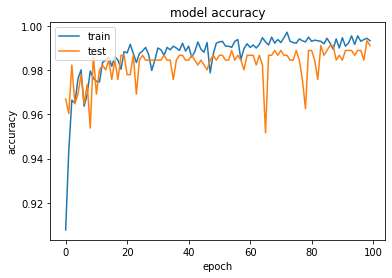

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Loss vs Epochs

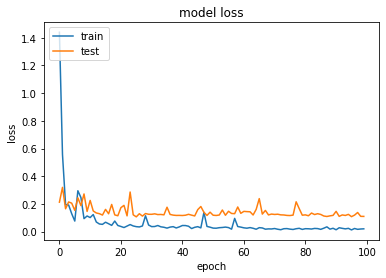

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()